#### Importing Needed Libraries and dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

##### Reading the Dataset

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### From above we get that the data is Supervied Data (Contains Target column named "Outcome")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## EDA

##### plotting a Histogram of the Age Variable 

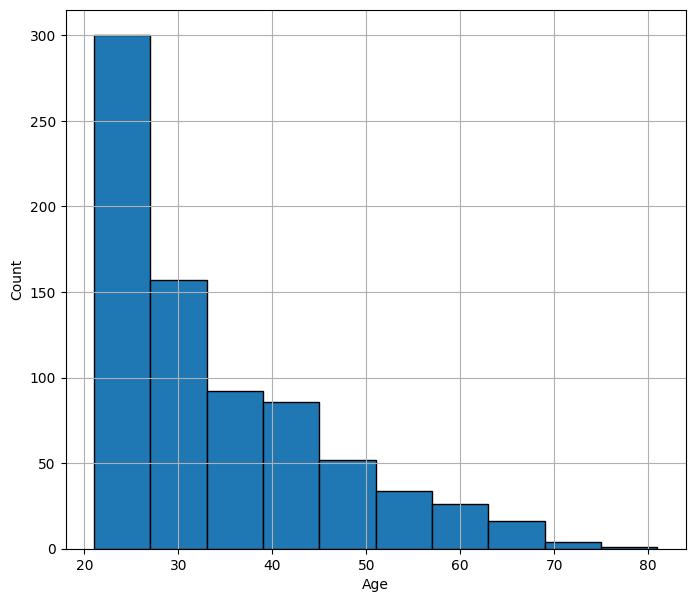

In [7]:
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")
plt.show()

#### Density graph

<Axes: xlabel='Age', ylabel='Density'>

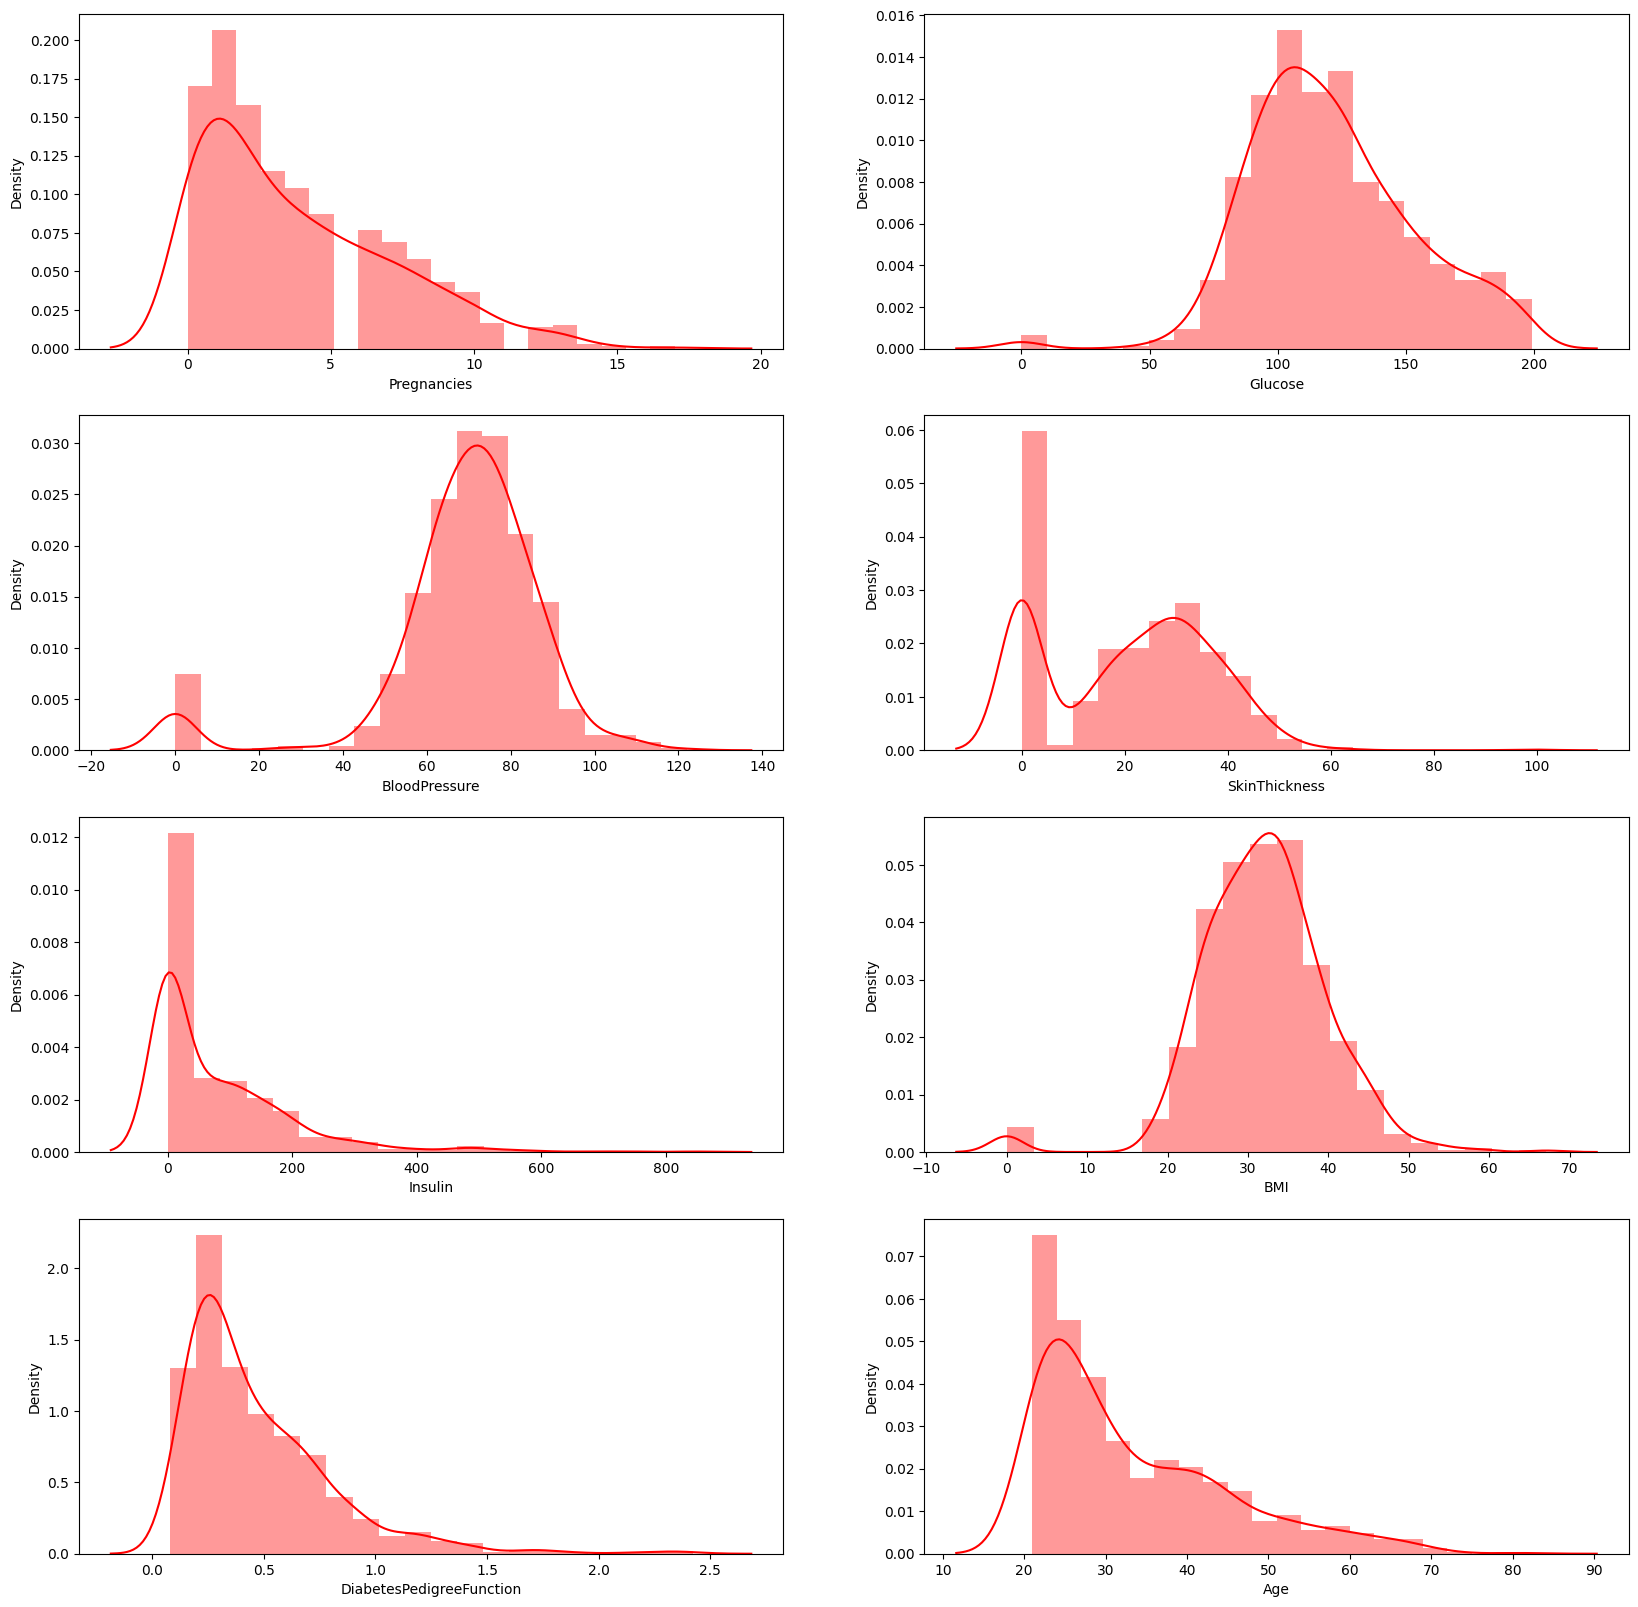

In [9]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

From this Above graps we get the Following:
Shape of distributions: Are they normal, skewed (left/right), or bimodal?
Spread of values: Minimum and maximum values, common ranges.
Presence of outliers: Extreme values appearing in the tails.
Comparison between features: Variability and scale differences.

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
sns.set()

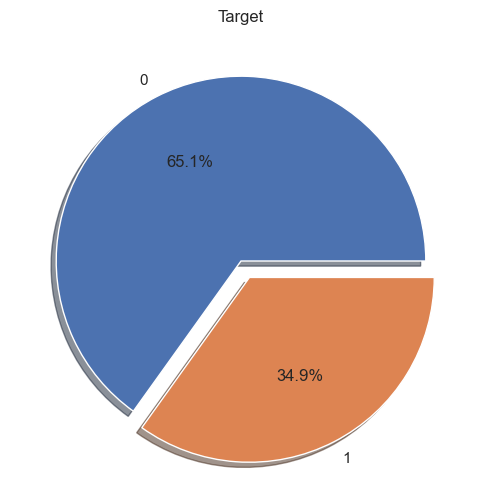

In [13]:
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", shadow=True)
plt.title('Target')
plt.ylabel('')
plt.show()


#### Correlation

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


correlation matrix is computed to understand the relationships between features.
Heatmap is plotted to visualize the correlation matrix.

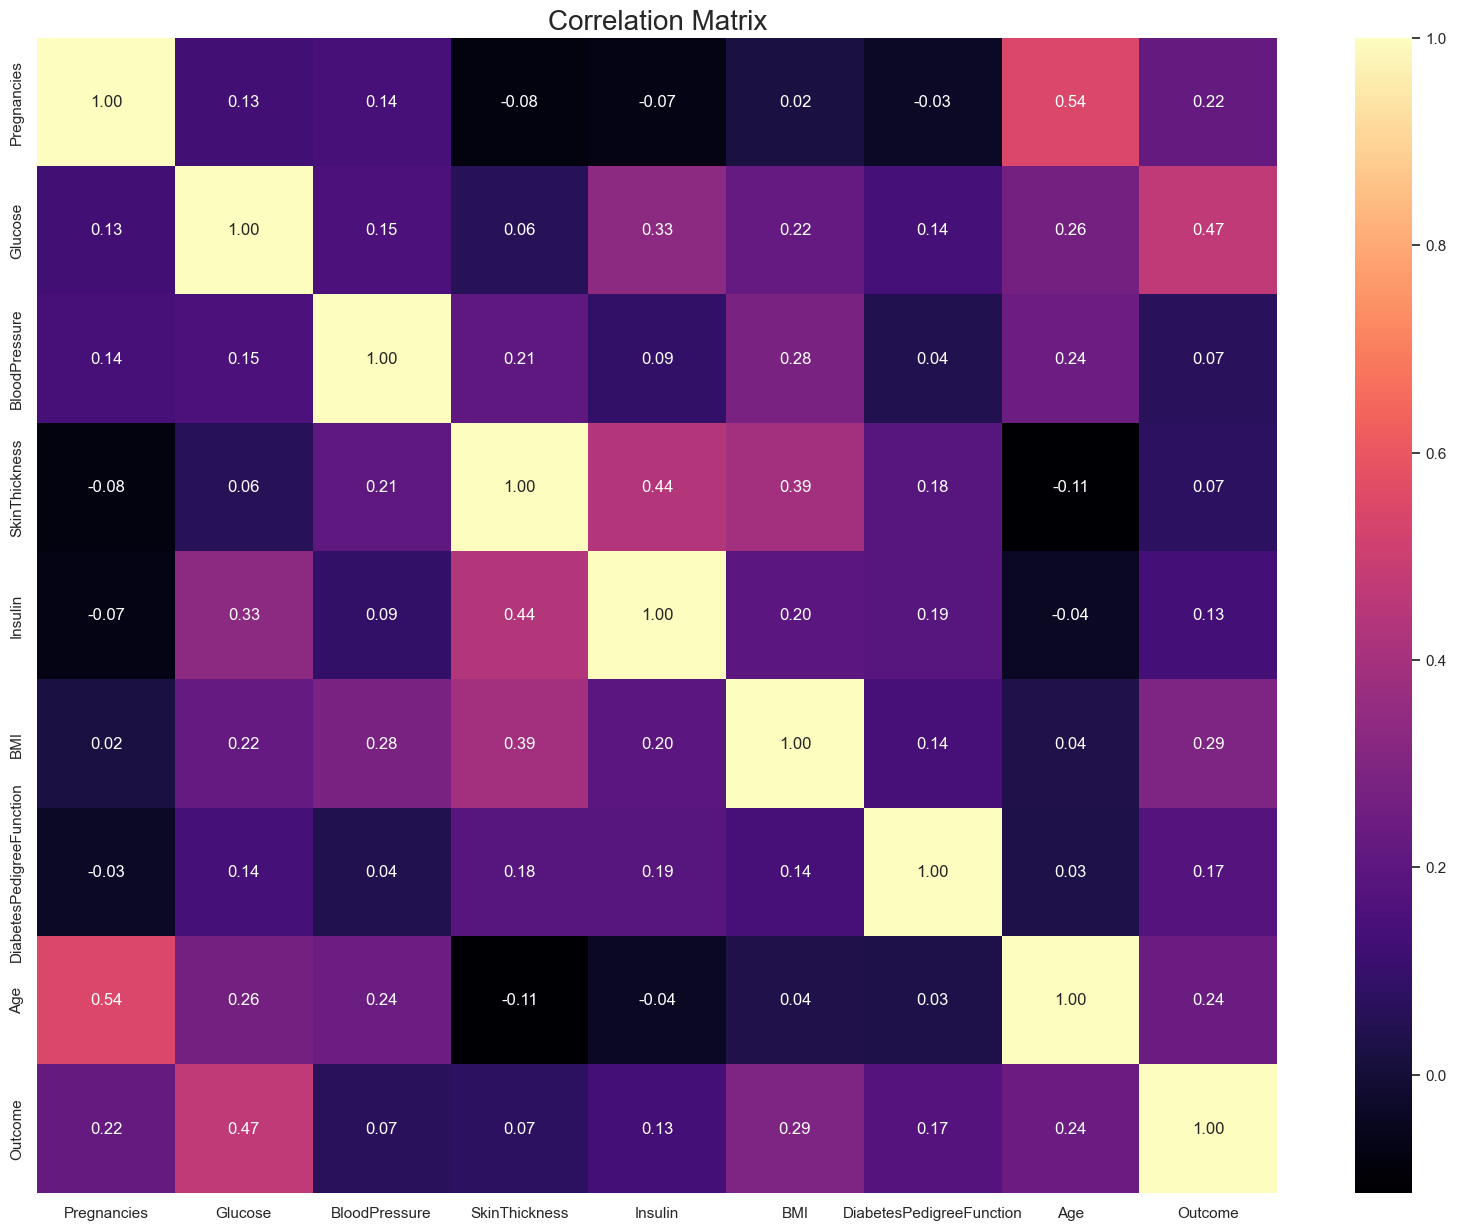

In [15]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

##### From Above Correlation we get that Glucose, BMI, Age, and Pregnancies are the most relevant features for predicting diabetes.

## EDA COMPLETED

In [16]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

##### Above We replaced 0 with NaN Since this is an Medical Relevent data and Zeros may be invalid values for some medical measurements as these values should never be zero in real life.

## Data Preprocessing

In [17]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

This function calculates the median value of a given column Outcome group. It first removes missing values, groups data by Outcome, computes the median, and returns the result as a DataFrame.

In [19]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_vals = median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i] = median_vals[i][0]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i] = median_vals[i][1]


This fills missing values (NaN) with the median of each feature based on Outcome. It loops through all columns excluding Target column(Outcome), calculates median values for each group, and replaces missing values accordingly.

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking for Outliers

##### Box plot

<Axes: xlabel='Insulin'>

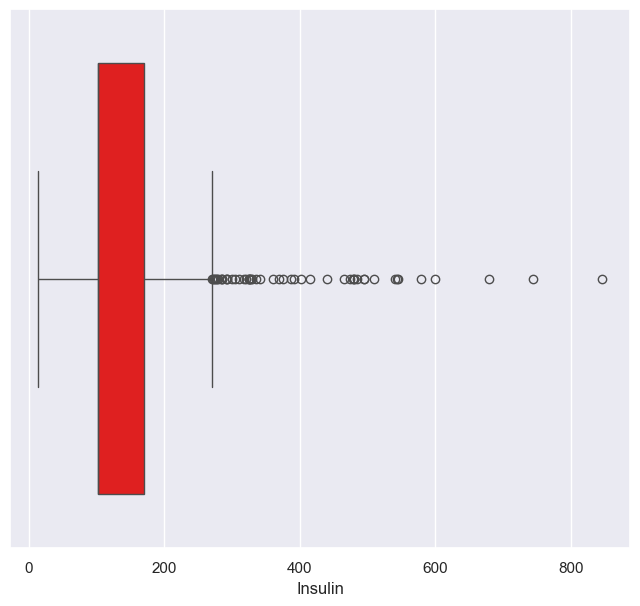

In [21]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

Above from box plot we get that their are some Outliers in the Insulin group

In [22]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR  
upper = Q3 + 1.5 * IQR  
df['Insulin'] = df['Insulin'].clip(lower, upper) 

This detects and caps outliers in the Insulin column using the Interquartile Range (IQR) method. It calculates the lower and upper bounds and replaces extreme values with these limits

<Axes: xlabel='Insulin'>

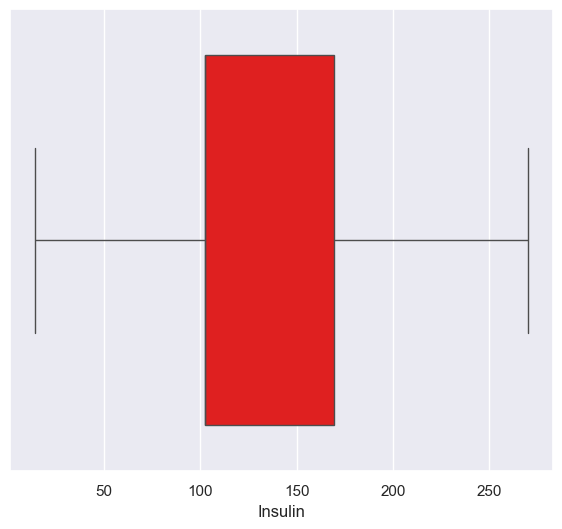

In [23]:
plt.figure(figsize=(7,6))
sns.boxplot(x= df["Insulin"], color="red")

This helps in reducing the impact of outliers while preserving the overall data distribution.

# Splitting
### Sperating Testing and Training Data

In [31]:
y = df['Outcome']
x = df.drop(columns=['Outcome'])

Here Y is the Target Varaible
and X is the feature Set

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

The dataset is split into training and testing sets (80% training, 20% testing).

### Scaling

In [36]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We Used Scaling for improving the Model performance

This is crucial because many machine learning algorithms perform better when features are on the same scale.

#### Logistic regression

In [37]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred=lreg.predict(x_test)

In [39]:
accuracy_score(y_train,lreg.predict(x_train))

0.7931596091205212

In [40]:
lreg.score(x_test,y_test)

0.8116883116883117

In [41]:
confusion_matrix(y_test,y_pred)

array([[84, 15],
       [14, 41]])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        99
           1       0.73      0.75      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



#### KNN

In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_train,knn.predict(x_train))

0.8990228013029316

In [44]:
knn_acc=accuracy_score(y_test,y_pred)
accuracy_score(y_test,knn.predict(x_test))


0.8636363636363636

In [45]:
confusion_matrix(y_test,y_pred)

array([[87, 12],
       [ 9, 46]])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



#### SVM

In [50]:
svc =SVC(C=0.5,gamma=0.1,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8701298701298701


In [51]:
svc_acc=accuracy_score(y_test,svc.predict(x_test))
print(accuracy_score(y_test,svc.predict(x_test)))

0.8701298701298701


In [52]:
print(confusion_matrix(y_test,y_pred))

[[89 10]
 [10 45]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.82      0.82      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



#### Decision tree

In [54]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8051948051948052


In [55]:
print(confusion_matrix(y_test,y_pred))

[[81 18]
 [12 43]]


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        99
           1       0.70      0.78      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154



In [57]:
radm_for=RandomForestClassifier(criterion='entropy',max_depth=15,max_features=0.75,min_samples_leaf=2,min_samples_split=3,n_estimators=130)
radm_for.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred=radm_for.predict(x_test)

In [61]:
print(confusion_matrix(y_test,y_pred))

[[87 12]
 [ 9 46]]


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Usinf Gradient Boosting to check for any better Output

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)

y_pred_gbm = gbm.predict(x_test)
print(classification_report(y_test, y_pred_gbm))


              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



In [69]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred = xgb.predict(x_test)
print(accuracy_score(y_train, xgb.predict(x_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))
print(accuracy_score(y_test, xgb.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9869706840390879
0.8246753246753247
[[87 12]
 [15 40]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        99
           1       0.77      0.73      0.75        55

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
best_model = RandomForestClassifier() #X_test
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Model Accuracy: 0.8831168831168831


## Evaluating for best model by initializaing all models together

#### Making a Predictive System

Takes new patient input data, preprocesses it, and predicts whether the person is diabetic using the trained GBM model.


In [77]:
input_data=(0,88,70,18,65,22.1,0.2,24)
input_data_as_numpy_Array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_Array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
predic=gbm.predict(std_data)
print(predic)
if predic[0]==0:
    print("The person is not Diabetic")
else:
    print("The person is Diabetic")

[0]
The person is not Diabetic


### Saving the Training model for Streamlit

Pickle is a Python module used to serialize (save) and deserialize (load) Python objects. This means it can store machine learning models, lists, dictionaries, and other objects as files, making them reusable without retraining.

In [78]:
import pickle

In [79]:
# with open ('best_diabetes_model.pkl','wb')as f:
#     pickle.dump(best_model,f)
# with open('diabscaler.pkl','wb') as f:
#    pickle.dump(scaler,f)